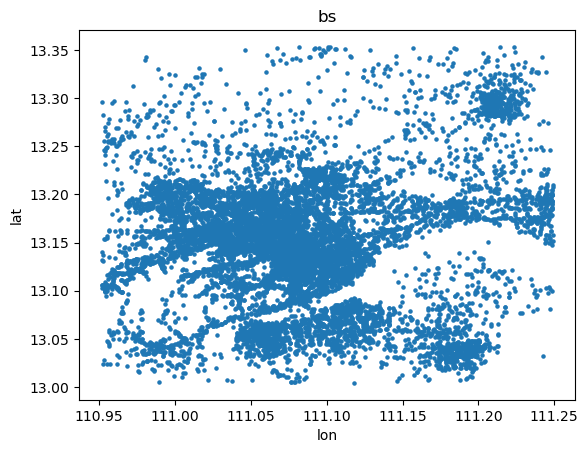

<Figure size 640x480 with 0 Axes>

In [12]:
# 展示相对地址

import pandas as pd
import matplotlib.pyplot as plt
import os
current_directory = os.getcwd()

# 读取csv文件
df = pd.read_csv(current_directory + '/traceset/topology.csv')
# 绘制散点图
plt.scatter(df['lon'], df['lat'],s=5)

# 添加标题和坐标轴标签
plt.title('bs')
plt.xlabel('lon')
plt.ylabel('lat')

# 显示图形
plt.show()
plt.savefig(current_directory + '/origin.png')

In [14]:
# 将时间进行转换，并且只保留packets

import pandas as pd
from datetime import datetime, timedelta, timezone

# 定义北京时区
tz_beijing = timezone(timedelta(hours=8))

current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv( current_directory + '/traceset/cellular_traffic.csv')

# 定义一个函数，将UNIX纪元时间转换为常规日期和时间
def convert_time(time_hour):
    dt = datetime.fromtimestamp(time_hour, tz=tz_beijing)
    return dt.strftime('%Y-%m-%d %H:%M:%S')

# 应用函数，将time_hour列转换为常规日期和时间
df['time_hour'] = df['time_hour'].apply(convert_time)

df_pivot = df.pivot(index='time_hour', columns='bs', values='packets')

# 将结果保存到新的csv文件中
df_pivot.to_csv(current_directory + '/beijing_cellular_traffic.csv', index=True)

In [2]:
# 只保留拥有足够数据的bs


import pandas as pd
import os
current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/beijing_cellular_traffic.csv',index_col=0)

# 筛选出超过67个有效单元格的基站id
valid_bs = df.count(axis=0)
valid_bs = valid_bs[valid_bs > 67]

# # 输出到txt文件
# with open('valid_bs.txt', 'w') as f:
#     for bs, count in valid_bs.items():
#         f.write(f'{bs}, {count}\n')
        
# 保留有效的基站id列
df = df[valid_bs.index]

# 输出到csv文件
df.to_csv(current_directory + '/valid_bs.csv')

/home/czh/workspace/cnfgnn/city-cellular-traffic-map


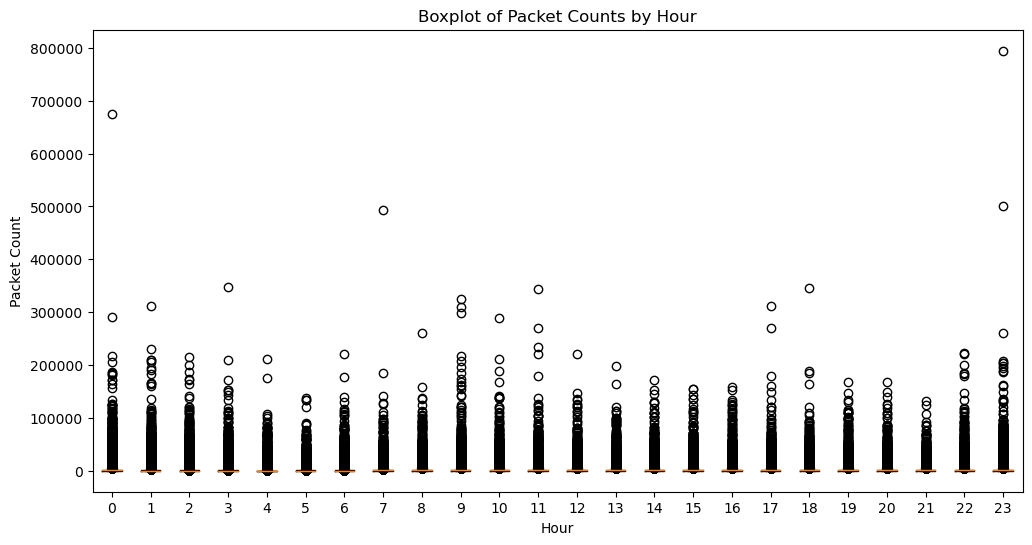

<Figure size 640x480 with 0 Axes>

In [8]:
# 展示离群值，需要忽略掉nan，否则会影响箱线图

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/valid_bs.csv',index_col=0)

# 将时间戳索引转换为datetime对象，并提取小时数
df.index = pd.to_datetime(df.index)
hours = df.index.hour

# 创建一个空的列表来保存按小时分组的数据
grouped = [df[hours == hour].values.flatten() for hour in range(24)]
grouped = [values[~np.isnan(values)] for values in grouped]

# print(grouped)
# 制作箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=range(24), positions=range(24))
plt.title('Boxplot of Packet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Packet Count')
plt.xticks(range(24))  # 设置x轴的刻度位置和标签为0~23小时
plt.show()

plt.savefig( current_directory + '/outlier.png')

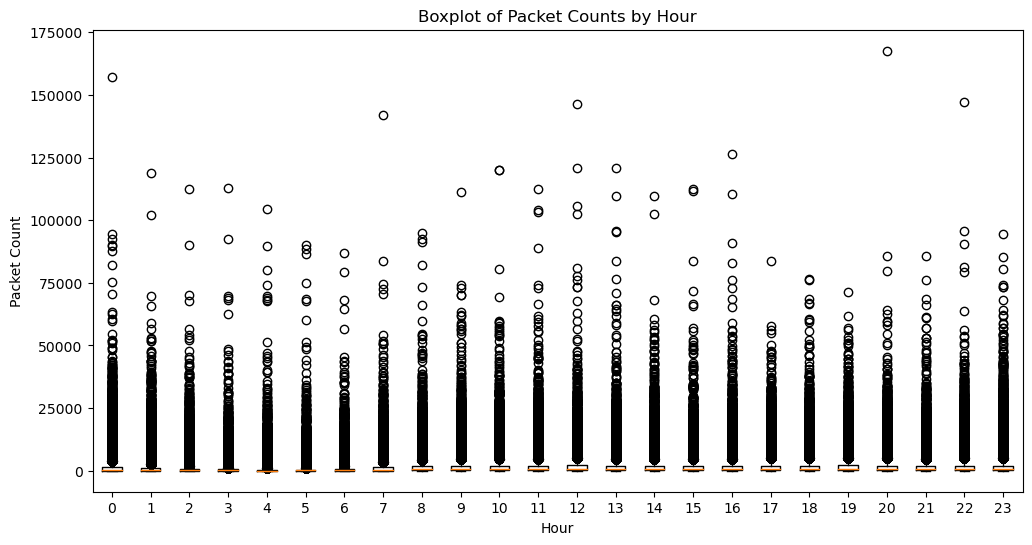

<Figure size 640x480 with 0 Axes>

In [16]:
# 去除离群值

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

import os
current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/valid_bs.csv',index_col=0)


# 计算Z-score
z_scores = stats.zscore(df,nan_policy='omit')
# print(z_scores)
# 设置阈值
threshold = 3

# 将Z-score大于阈值的值设置为NaN
df[(np.abs(z_scores) > threshold)] = np.nan
# 输出到csv文件
df.to_csv(current_directory + '/valid_removeoutlier_bs.csv')

# # 找到值超过800000的基站id和对应的时间戳
# result = df[df > 400000].stack().reset_index()
# # 输出结果
# print(result)

# 将时间戳索引转换为datetime对象，并提取小时数
df.index = pd.to_datetime(df.index)
hours = df.index.hour
# 创建一个空的列表来保存按小时分组的数据
grouped = [df[hours == hour].values.flatten() for hour in range(24)]
grouped = [values[~np.isnan(values)] for values in grouped]
# 制作箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=range(24), positions=range(24))
plt.title('Boxplot of Packet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Packet Count')
plt.xticks(range(24))  # 设置x轴的刻度位置和标签为0~23小时
plt.show()

plt.savefig(current_directory + '/valid_removeoutlier_bs.png')

(192, 7521)


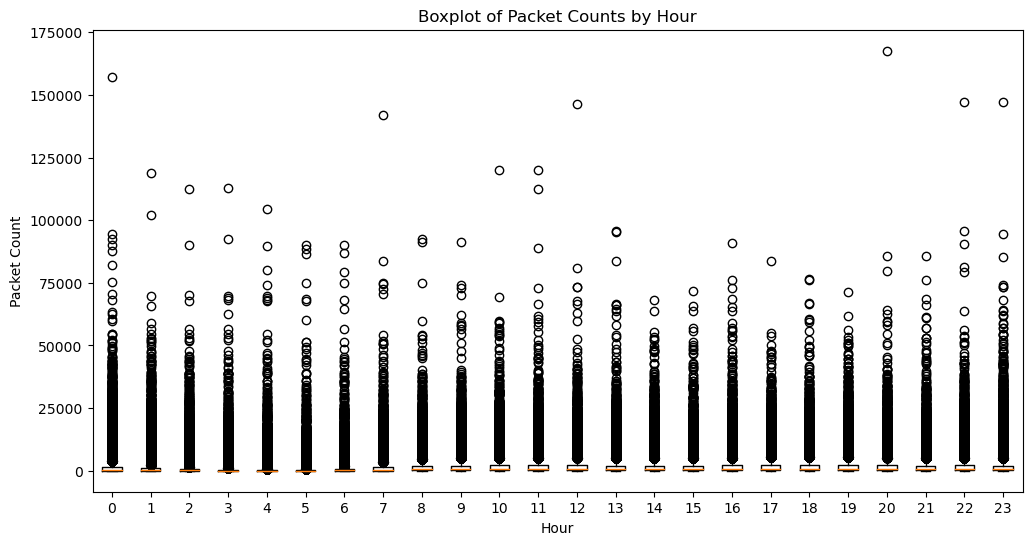

<Figure size 640x480 with 0 Axes>

In [17]:
# 填充NAN

import pandas as pd
import os
current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/valid_removeoutlier_bs.csv', index_col=0)

# 将NaN值替换为前一个小时的值
df.fillna(method='ffill', inplace=True)

# 删除包含NaN值的列
df = df.dropna(axis=1)
print(df.shape)
# # 找到值为NaN的行和列
# nan_rows = df[df.isnull().any(axis=1)]
# nan_cols = df.columns[df.isnull().any()].tolist()

# print('Rows with NaN values:')
# print(nan_rows)

# print('Columns with NaN values:')
# print(nan_cols)

# 将时间戳索引转换为datetime对象，并提取小时数
df.index = pd.to_datetime(df.index)
hours = df.index.hour
# 创建一个空的列表来保存按小时分组的数据
grouped = [df[hours == hour].values.flatten() for hour in range(24)]
grouped = [values[~np.isnan(values)] for values in grouped]

# 制作箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=range(24), positions=range(24))
plt.title('Boxplot of Packet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Packet Count')
plt.xticks(range(24))  # 设置x轴的刻度位置和标签为0~23小时
plt.show()

plt.savefig(current_directory + '/fill_nan.png')

df.to_csv(current_directory + '/fill_nan.csv')

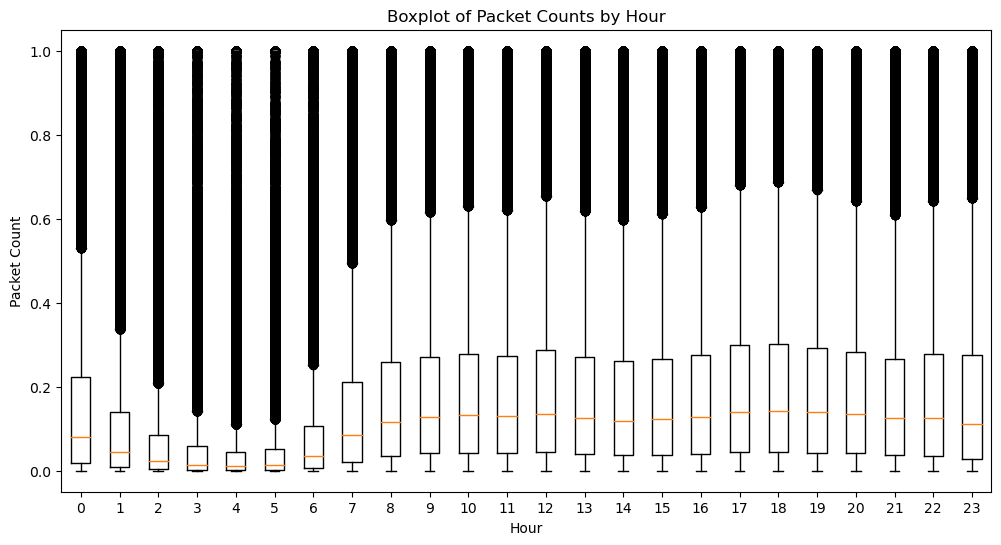

In [18]:
# normalization

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/fill_nan.csv', index_col=0)
# 创建一个MinMaxScaler对象
scaler = MinMaxScaler()

# 对DataFrame的所有列进行归一化
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)


df.index = pd.to_datetime(df.index)
hours = df.index.hour
# 创建一个空的列表来保存按小时分组的数据
grouped = [df[hours == hour].fillna(0).values.flatten() for hour in range(24)]
# 制作箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=range(24), positions=range(24))
plt.title('Boxplot of Packet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Packet Count')
plt.xticks(range(24))  # 设置x轴的刻度位置和标签为0~23小时
plt.show()

# 保存新的CSV文件
df.to_csv(current_directory + '/normalized_file.csv')